In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots in the Jupyter notebook
%matplotlib inline

cities = pd.read_csv('./Grocery Sales Data/cities.csv', encoding = 'ISO-8859-1', engine='python')
customers = pd.read_csv('./Grocery Sales Data/customers.csv', encoding = 'ISO-8859-1', engine='python')
item_master = pd.read_csv('./Grocery Sales Data/item_master.csv', encoding = 'ISO-8859-1', engine='python')
sales = pd.read_csv('./Grocery Sales Data/sales.csv', encoding = 'ISO-8859-1', engine='python')
sales_rep = pd.read_csv('./Grocery Sales Data/sales_rep.csv', encoding = 'ISO-8859-1', engine='python')

In [5]:
#check if any null value in dataframe
cities.info()
#Find the null value in the collum
cities[cities.isnull().any(axis=1)]
#Replace the value by something you like
cities.fillna('None', inplace=True)
#Check the result
cities[cities.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       100 non-null    object 
 1   City Code  100 non-null    int64  
 2   Region     100 non-null    object 
 3   Latitude   100 non-null    float64
 4   Longitude  100 non-null    float64
 5   Desc       99 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


,City,City Code,Region,Latitude,Longitude,Desc


In [6]:
customers.info()
customers[customers.isnull().any(axis=1)]
#Nothing to signal here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         684 non-null    object
 1   Customer Number  684 non-null    int64 
 2   City Code        684 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


,Customer,Customer Number,City Code


In [7]:
item_master.info()
item_master[item_master.isnull().any(axis=1)]
#Nothing to signal here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        827 non-null    int64 
 1   Product Group      827 non-null    object
 2   Product Line       827 non-null    object
 3   Product Sub Group  827 non-null    object
 4   Product Type       827 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.4+ KB


,Item Number,Product Group,Product Line,Product Sub Group,Product Type


In [8]:
sales.info()
sales[sales.isnull().any(axis=1)]
#We need to change the format of Date and Promised Delivery Date
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Promised Delivery Date'] = pd.to_datetime(sales['Promised Delivery Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %KEY                    96466 non-null  int64  
 1   Cost                    96466 non-null  float64
 2   Customer Number         96466 non-null  int64  
 3   Date                    96466 non-null  object 
 4   GrossSales              96466 non-null  float64
 5   Invoice Date            96466 non-null  object 
 6   Invoice Number          96466 non-null  int64  
 7   Item Desc               96466 non-null  object 
 8   Item Number             96466 non-null  int64  
 9   Margin                  96466 non-null  float64
 10  Order Number            96466 non-null  int64  
 11  Promised Delivery Date  96466 non-null  object 
 12  Sales                   96466 non-null  float64
 13  Sales Qty               96466 non-null  float64
 14  Sales Rep Number        96466 non-null

In [9]:
sales_rep.info()
sales_rep[sales_rep.isnull().any(axis=1)]
sales_rep.fillna('Nobody', inplace=True)
sales_rep[sales_rep.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manager          64 non-null     object
 1   Manager Number   64 non-null     int64 
 2   Path             64 non-null     object
 3   Sales Rep Name   64 non-null     object
 4   Sales Rep Name1  64 non-null     object
 5   Sales Rep Name2  59 non-null     object
 6   Sales Rep Name3  39 non-null     object
 7   Sales Rep ID     64 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID


In [10]:
#Rename Sales Rep Number in sales.csv so we can join easily
sales.rename(columns={'Sales Rep Number' : 'Sales Rep ID'}, inplace=True)

In [11]:
#left join to create the ultimate dataframe
sales_with_customer = pd.merge(sales,
                        customers[['Customer','Customer Number', 'City Code']],
                        how='left',
                        on='Customer Number')

sales_with_cities = pd.merge(sales_with_customer,
                        cities[['City', 'City Code', 'Region', 'Latitude', 'Longitude', 'Desc']],
                        how='left',
                        on='City Code')

sales_item_master = pd.merge(sales_with_cities,
                        item_master[['Item Number', 'Product Group', 'Product Line', 'Product Sub Group', 'Product Type']],
                        how='left',
                        on='Item Number')

final_sales = pd.merge(sales_item_master,
                    sales_rep[['Manager','Manager Number', 'Path', 'Sales Rep Name','Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3', 'Sales Rep ID']],
                    how='left',
                    on='Sales Rep ID')

In [12]:
final_sales.columns

Index(['%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Date',
       'Invoice Number', 'Item Desc', 'Item Number', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep ID',
       'Customer', 'City Code', 'City', 'Region', 'Latitude', 'Longitude',
       'Desc', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', 'Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3'],
      dtype='object')

In [13]:
#Add a collumn to find the delivery time expected by order
final_sales['Delivery Time'] = (final_sales['Promised Delivery Date'] - final_sales['Date']).dt.days

#in some cases, the number is negative like if the Promised Delivery Date was before the Date of purchase...
#so I don't think my next chart is relevant

<AxesSubplot:title={'center':'Avg delivery time per Region (in days)'}, xlabel='Region'>

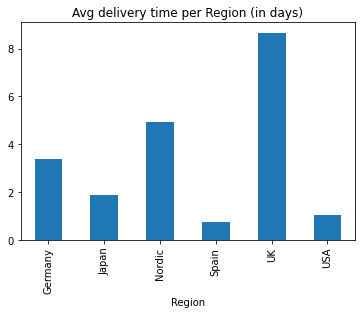

In [14]:
final_sales.groupby('Region').mean()['Delivery Time'].plot(kind='bar', title='Avg delivery time per Region (in days)')
#seeing the chart, we have a delivery problem in the UK that we should fix
#not sure it is relevant like explained above